In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from string import punctuation

from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/david/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
file = open('user.json', 'r')
# user has 1,637,138 entries

In [3]:
stop = 1637138
all_data = []
for i, line in enumerate(file):
    if i%1637138 == 0:
        print(i)
    if i == stop:
        break
    
    data = json.loads(line)
    
    names = data['name']
    review_count = data['review_count']
    yelp_since = data['yelping_since']
    useful = data['useful']
    funny = data['funny']
    cool = data['cool']
    elite = data['elite']
    fans = data['fans']
    avg_stars = data['average_stars']
    
    all_data.append([names
                    , review_count
                    , yelp_since
                    , useful
                    , funny
                    , cool
                    , elite
                    , fans
                    , avg_stars])
    
df = pd.DataFrame(all_data, columns=['name'
                                    , 'review_count'
                                    , 'yelp_since'
                                    , 'useful'
                                    , 'funny'
                                    , 'cool'
                                    , 'elite'
                                    , 'fans'
                                    , 'avg_stars'])
file.close()

0


In [4]:
df.head(5)

,name,review_count,yelp_since,useful,funny,cool,elite,fans,avg_stars
0,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017",5,4.03
1,Jenna,33,2013-02-21 22:29:06,48,22,16,,4,3.63
2,David,16,2013-10-04 00:16:10,28,8,10,,0,3.71
3,Angela,17,2014-05-22 15:57:30,30,4,14,,5,4.85
4,Nancy,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018",39,4.08


In [5]:
df.tail(5)

,name,review_count,yelp_since,useful,funny,cool,elite,fans,avg_stars
1637133,Jiaxin,2,2016-02-24 19:28:47,0,0,0,,0,4.5
1637134,Wes,8,2017-02-25 23:34:05,0,0,0,,0,4.0
1637135,Lee,4,2009-08-19 22:08:16,8,0,0,,0,3.4
1637136,Melissa,1,2018-10-15 17:07:43,1,0,0,,0,3.0
1637137,Erin,1,2016-03-03 21:56:06,0,0,0,,0,5.0


In [6]:
df['avg_stars'].median()

3.89

In [7]:
df['review_count'].median()

5.0

In [8]:
df['yelp_since'] = pd.to_datetime(df.yelp_since)

In [9]:
df.head(5)

,name,review_count,yelp_since,useful,funny,cool,elite,fans,avg_stars
0,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017",5,4.03
1,Jenna,33,2013-02-21 22:29:06,48,22,16,,4,3.63
2,David,16,2013-10-04 00:16:10,28,8,10,,0,3.71
3,Angela,17,2014-05-22 15:57:30,30,4,14,,5,4.85
4,Nancy,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018",39,4.08


In [10]:
df.dtypes

name                    object
review_count             int64
yelp_since      datetime64[ns]
useful                   int64
funny                    int64
cool                     int64
elite                   object
fans                     int64
avg_stars              float64
dtype: object

In [11]:
user_since = df.yelp_since.to_numpy()

In [12]:
user_since.min()

numpy.datetime64('2004-10-12T08:40:43.000000000')

In [13]:
user_since.max()

numpy.datetime64('2018-11-14T18:02:13.000000000')

In [14]:
df['year_since'] = df.yelp_since.dt.year

In [15]:
df.head(5)

,name,review_count,yelp_since,useful,funny,cool,elite,fans,avg_stars,year_since
0,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017",5,4.03,2013
1,Jenna,33,2013-02-21 22:29:06,48,22,16,,4,3.63,2013
2,David,16,2013-10-04 00:16:10,28,8,10,,0,3.71,2013
3,Angela,17,2014-05-22 15:57:30,30,4,14,,5,4.85,2014
4,Nancy,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018",39,4.08,2013


In [16]:
df.year_since.value_counts()

2015    238660
2014    225437
2016    199148
2013    197220
2012    182900
2011    168467
2017    120531
2010    106840
2018     78016
2009     63977
2008     32544
2007     16480
2006      5836
2005      1001
2004        81
Name: year_since, dtype: int64

In [17]:
df.year_since.value_counts().sort_index()

2004        81
2005      1001
2006      5836
2007     16480
2008     32544
2009     63977
2010    106840
2011    168467
2012    182900
2013    197220
2014    225437
2015    238660
2016    199148
2017    120531
2018     78016
Name: year_since, dtype: int64

Text(0, 0.5, 'Frequency')

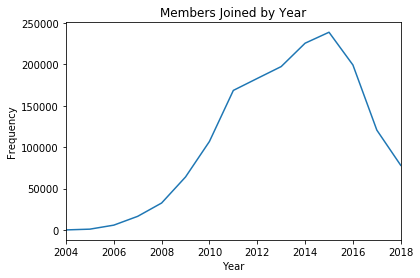

In [18]:
df.year_since.value_counts().sort_index().plot()
plt.title('Members Joined by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

In [19]:
name_words = df['name'].str.lower()
name_counts = Counter(word_tokenize('\n'.join(name_words)))
name_counts.most_common()

[('john', 14895),
 ('david', 13961),
 ('michael', 13920),
 ('chris', 12425),
 ('mike', 11619),
 ('jennifer', 10518),
 ('jessica', 9497),
 ('sarah', 8954),
 ('michelle', 8856),
 ('mark', 8323),
 ('lisa', 8237),
 ('jason', 7801),
 ('brian', 7730),
 ('james', 7545),
 ('j', 7432),
 ('robert', 7043),
 ('ashley', 7000),
 ('kevin', 6936),
 ('steve', 6848),
 ('stephanie', 6770),
 ('ryan', 6733),
 ('amanda', 6697),
 ('jeff', 6541),
 ('amy', 6419),
 ('melissa', 6380),
 ('alex', 6358),
 ('scott', 6352),
 ('matt', 6331),
 ('mary', 6246),
 ('nicole', 6199),
 ('eric', 6160),
 ('joe', 6093),
 ('paul', 5853),
 ('andrew', 5792),
 ('laura', 5771),
 ('daniel', 5389),
 ('kelly', 5232),
 ('heather', 5191),
 ('karen', 5157),
 ('m', 5150),
 ('kim', 5076),
 ('rachel', 4973),
 ('lauren', 4962),
 ('emily', 4952),
 ('julie', 4903),
 ('jim', 4804),
 ('dan', 4731),
 ('katie', 4683),
 ('tom', 4476),
 ('susan', 4449),
 ('a', 4338),
 ('linda', 4260),
 ('justin', 4205),
 ('tim', 4195),
 ('adam', 4182),
 ('elizabeth', 

In [20]:
top_20_names = name_counts.most_common(20)

Text(0.5, 1.0, 'Top 20 Names on Yelp Rewiews Dataset')

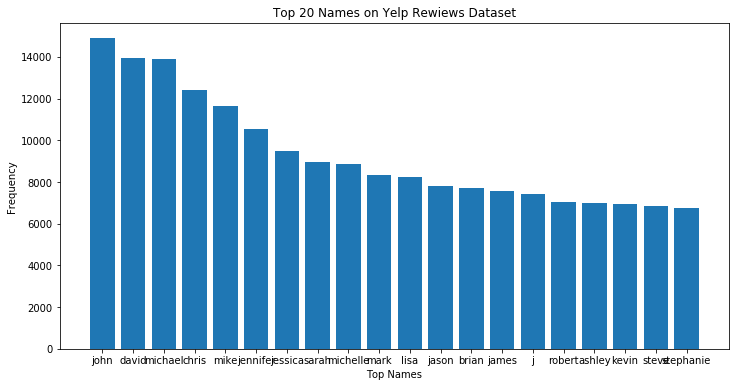

In [21]:
names, counts = zip(*top_20_names)
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(names, counts, align='center')
ax.set_xlabel('Top Names')
ax.set_ylabel('Frequency')
ax.set_title('Top 20 Names on Yelp Rewiews Dataset')

In [22]:
df.head()

,name,review_count,yelp_since,useful,funny,cool,elite,fans,avg_stars,year_since
0,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017",5,4.03,2013
1,Jenna,33,2013-02-21 22:29:06,48,22,16,,4,3.63,2013
2,David,16,2013-10-04 00:16:10,28,8,10,,0,3.71,2013
3,Angela,17,2014-05-22 15:57:30,30,4,14,,5,4.85,2014
4,Nancy,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018",39,4.08,2013


In [32]:
df['years_since'] = 2019 - df.yelp_since.dt.year

In [61]:
%%time
df.head()

CPU times: user 1.55 ms, sys: 6 µs, total: 1.55 ms
Wall time: 1.38 ms


,name,review_count,yelp_since,useful,funny,cool,elite,fans,avg_stars,year_since,years_since
0,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017",5,4.03,2013,6
1,Jenna,33,2013-02-21 22:29:06,48,22,16,,4,3.63,2013,6
2,David,16,2013-10-04 00:16:10,28,8,10,,0,3.71,2013,6
3,Angela,17,2014-05-22 15:57:30,30,4,14,,5,4.85,2014,5
4,Nancy,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018",39,4.08,2013,6


In [62]:
df.years_since.max()

15

In [63]:
df.years_since.min()

1

In [76]:
stars = np.linspace(1,5,num=9)
stars

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [77]:
avg_years = []
for x in stars:
    avg_years.append(df[df['avg_stars'] == x].years_since.mean())
avg_years

[3.9821191670992673,
 4.69419401370357,
 4.545312761098423,
 5.184808198310483,
 4.787430784460907,
 5.405986057112213,
 5.2478955486998675,
 5.296225527661826,
 4.395037280084233]

In [78]:
print(len(stars))
print(len(avg_years))

9
9


In [79]:
df[df['avg_stars'] == 1.5].years_since.mean()

4.69419401370357

In [80]:
y_review = df['review_count'].to_numpy()
y_useful = df['useful'].to_numpy()
y_funny = df['funny'].to_numpy()
y_cool = df['cool'].to_numpy()
y_fans = df['fans'].to_numpy()
x = df['avg_stars'].to_numpy()

CPU times: user 11.2 s, sys: 40 ms, total: 11.2 s
Wall time: 11.2 s


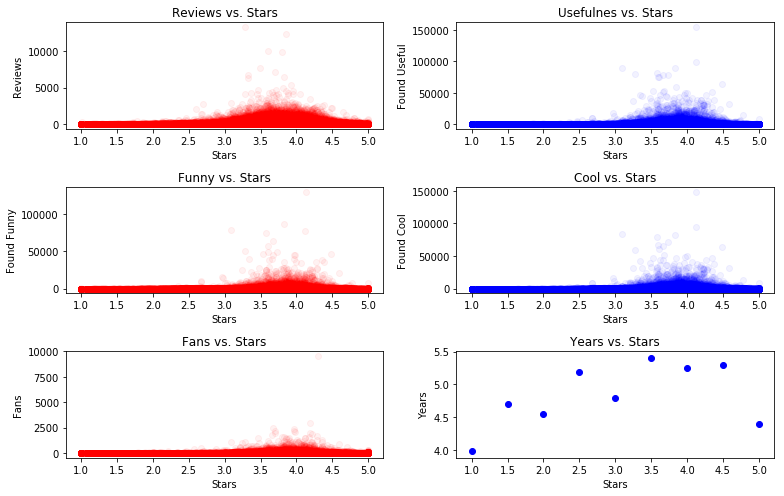

In [82]:
%%time

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize =(11,7), tight_layout=True)

ax1.scatter(x, y_review, color = 'red', alpha = 0.05)
ax1.set_xlabel('Stars')
ax1.set_ylabel('Reviews')
ax1.set_title('Reviews vs. Stars')

ax2.scatter(x, y_useful, color = 'blue', alpha = 0.05)
ax2.set_xlabel('Stars')
ax2.set_ylabel('Found Useful')
ax2.set_title('Usefulnes vs. Stars')

ax3.scatter(x, y_funny, color = 'red', alpha = 0.05)
ax3.set_xlabel('Stars')
ax3.set_ylabel('Found Funny')
ax3.set_title('Funny vs. Stars')

ax4.scatter(x, y_cool, color = 'blue', alpha = 0.05)
ax4.set_xlabel('Stars')
ax4.set_ylabel('Found Cool')
ax4.set_title('Cool vs. Stars')

ax5.scatter(x, y_fans, color = 'red', alpha = 0.05)
ax5.set_xlabel('Stars')
ax5.set_ylabel('Fans')
ax5.set_title('Fans vs. Stars')

ax6.scatter(stars, avg_years, color = 'blue')
ax6.set_xlabel('Stars')
ax6.set_ylabel('Years')
ax6.set_title('Years vs. Stars')